In [85]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/gunting, batu, atau kertas.zip

--2020-07-22 07:44:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/gunting,’

/tmp/gunting,       100%[===================>] 307.92M  8.31MB/s    in 45s     

2020-07-22 07:45:38 (6.88 MB/s) - ‘/tmp/gunting,’ saved [322873683/322873683]

--2020-07-22 07:45:38--  http://batu,/
Resolving batu, (batu,)... failed: Name or service not known.
wget: unable to resolve host address ‘batu,’
--2020-07-22 07:45:38--  http://atau/
Resolving atau (atau)... failed: Name or service not known.
wget: unable to resolve host address ‘atau’
--2020-07-22 07:45:38--  http://kertas.zip/
Resolving kertas.zip (kertas.zip)... 

In [87]:
import zipfile,os
local_zip = '/tmp/gunting,'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [88]:
pip install split-folders


In [89]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors', output="/tmp/rockpaperscissors/data", seed=1337, ratio=(0.6, 0.4))


Copying files: 2189 files [00:00, 3979.63 files/s]


In [90]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [91]:
!rm -rf /tmp/rockpaperscissors/data/train/rps-cv-images
!rm -rf /tmp/rockpaperscissors/data/val/rps-cv-images
!rm -rf /tmp/rockpaperscissors/data/train/data
!rm -rf /tmp/rockpaperscissors/data/val/data

In [92]:
os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

['scissors', 'paper', 'rock']

In [93]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [94]:
num_rock_tr = len(os.listdir(train_rock_dir))
num_paper_tr = len(os.listdir(train_paper_dir))
num_scissors_tr = len(os.listdir(train_scissors_dir))
num_rock_val = len(os.listdir(validation_rock_dir))
num_paper_val = len(os.listdir(validation_paper_dir))
num_scissors_val = len(os.listdir(validation_scissors_dir))
total_train = num_rock_tr + num_paper_tr + num_scissors_tr
total_val = num_rock_val + num_paper_val + num_scissors_val

In [95]:
print('total training rock images:', num_rock_tr)
print('total training paper images:', num_paper_tr)
print('total training scissors images:', num_scissors_tr)
print('total validation rock images:', num_rock_val)
print('total validation paper images:', num_paper_val)
print('total validation scissors images:', num_scissors_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training rock images: 435
total training paper images: 427
total training scissors images: 450
total validation rock images: 291
total validation paper images: 285
total validation scissors images: 300
--
Total training images: 1312
Total validation images: 876


In [96]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2, 
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4,
                    brightness_range=[0.2,1.0],
                    zoom_range=[0.5,1.0])
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2, 
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4,
                    brightness_range=[0.2,1.0],
                    zoom_range=[0.5,1.0])

In [97]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=16,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        batch_size=16, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [98]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

In [99]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model_dropout.stop_training = True
log_dir = os.path.join('./logs')
callbacks = myCallback()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=0)

In [100]:
model_dropout = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', strides=(2,2), padding='same', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2), 
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')])

In [101]:
opt = Adam(learning_rate=0.001, beta_1=0.01)

In [102]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [103]:
history = model_dropout.fit(
      train_generator,
      steps_per_epoch=train_generator.samples / train_generator.batch_size,  
      epochs=25,
      validation_data=validation_generator, 
      validation_steps=validation_generator.samples / validation_generator.batch_size - 1, 
      verbose=1,
      callbacks=[tb_cb])

Epoch 1/25
82/82 [==============================] - 29s 350ms/step - loss: 1.0780 - accuracy: 0.4085 - val_loss: 0.9432 - val_accuracy: 0.4942
Epoch 2/25
82/82 [==============================] - 28s 346ms/step - loss: 0.6905 - accuracy: 0.7058 - val_loss: 0.9707 - val_accuracy: 0.6181
Epoch 3/25
82/82 [==============================] - 28s 344ms/step - loss: 0.5385 - accuracy: 0.7797 - val_loss: 0.4998 - val_accuracy: 0.7951
Epoch 4/25
82/82 [==============================] - 28s 342ms/step - loss: 0.4827 - accuracy: 0.8064 - val_loss: 0.4460 - val_accuracy: 0.8449
Epoch 5/25
82/82 [==============================] - 28s 343ms/step - loss: 0.4466 - accuracy: 0.8285 - val_loss: 0.4153 - val_accuracy: 0.8588
Epoch 6/25
82/82 [==============================] - 28s 344ms/step - loss: 0.3823 - accuracy: 0.8613 - val_loss: 0.4744 - val_accuracy: 0.8206
Epoch 7/25
82/82 [==============================] - 28s 342ms/step - loss: 0.3717 - accuracy: 0.8735 - val_loss: 0.3517 - val_accuracy: 0.8762

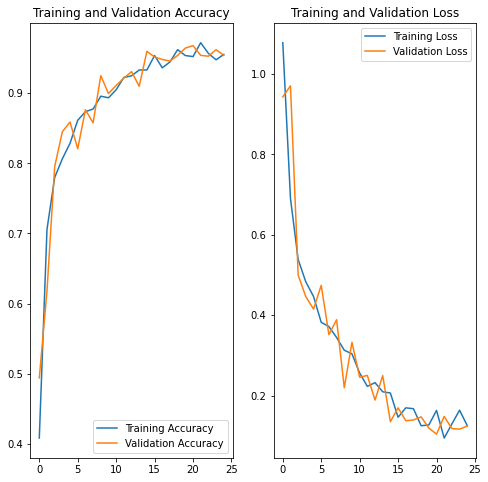

In [104]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

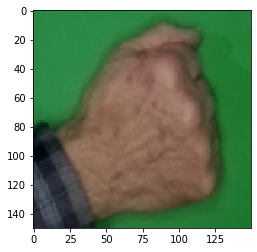

[0. 1. 0.]


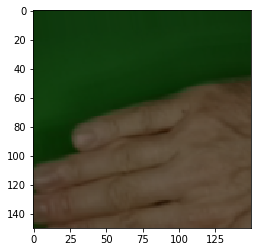

[1. 0. 0.]


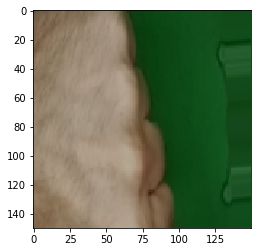

[0. 1. 0.]

1 di awal = paper
1 di tengah = rock
1 di akhir = scissors



In [105]:
for z in range(3):
  x, y = train_generator.next()
  plt.imshow(x[0], interpolation='nearest')
  plt.show()
  print(y[0])

print('''
1 di awal = paper
1 di tengah = rock
1 di akhir = scissors
''')

In [106]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving IMG_20200708_144000.jpg to IMG_20200708_144000.jpg
IMG_20200708_144000.jpg
rock


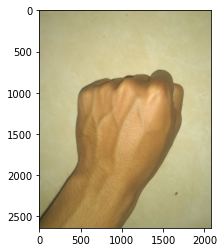

In [109]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_dropout.predict(images, batch_size=16)
  result = np.argmax(classes)
  plt.imshow(mpimg.imread(path))
  
  print(fn)
  if result == 0:
    print('paper')
  elif result == 1:
    print('rock')
  else:
    print('scissors')